In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection


In [2]:
#Pinhole model
def pinHole(W, A, O, T):
    motionMat = np.hstack((O, T))
    X = np.zeros((W.shape[0], W.shape[1]))
    i = 0
    for w in W:
        w_ = np.vstack((np.reshape(w, (3, 1)), [1]))
        x_ = A @ motionMat @ w_
        x_ = x_/x_[2]
        X[i] = x_.T
        i += 1
    return X

#Plotting function


def plotProj(proj, title='2D proj'):
    proj = np.hstack((proj, np.zeros((proj.shape[0], 1))))
    print(proj.shape)

    x_max = np.amax(proj[:, 0])
    x_min = np.amin(proj[:, 0])

    y_max = np.amax(proj[:, 1])
    y_min = np.amin(proj[:, 1])

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter3D(proj[:, 0], proj[:, 1], proj[:, 2])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    padding = 25
    # ax.set_xlim(400, 800)
    # ax.set_xlim(200, 500)
    ax.set_xlim(x_min-padding, x_max+padding)
    ax.set_ylim(y_min-padding, y_max+padding)
    # ax.set_xlim(-1, 1)
    # ax.set_ylim(-1, 1)
    verts = [[proj[0], proj[1], proj[2], proj[3]], [proj[4], proj[5], proj[6], proj[7]], [
        proj[0], proj[1], proj[5], proj[4]], [proj[3], proj[2], proj[6], proj[7]]]
    #[X[1],X[2],X[6],X[5]], [X[1],X[2],X[5],X[7]]]

    # plot sides
    ax.add_collection3d(Poly3DCollection(
        verts, facecolors='w', linewidths=1, edgecolors='k', alpha=.25))
    ax.set_title(title)
    ax.view_init(90, 90)


def plotReProj(proj, proj_, title='2D proj'):
    proj = np.hstack((proj, np.zeros((proj.shape[0], 1))))
    print(proj.shape)

    proj_ = np.hstack((proj_, np.zeros((proj_.shape[0], 1))))

    x_max = np.amax(proj[:, 0])
    x_min = np.amin(proj[:, 0])

    y_max = np.amax(proj[:, 1])
    y_min = np.amin(proj[:, 1])

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter3D(proj[:, 0], proj[:, 1], proj[:, 2])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    padding = 25
    # ax.set_xlim(400, 800)
    # ax.set_xlim(200, 500)
    ax.set_xlim(x_min-padding, x_max+padding)
    ax.set_ylim(y_min-padding, y_max+padding)
    # ax.set_xlim(-1, 1)
    # ax.set_ylim(-1, 1)
    verts = [[proj[0], proj[1], proj[2], proj[3]], [proj[4], proj[5], proj[6], proj[7]], [
        proj[0], proj[1], proj[5], proj[4]], [proj[3], proj[2], proj[6], proj[7]]]

    verts_ = [[proj_[0], proj_[1], proj_[2], proj_[3]], [proj_[4], proj_[5], proj_[6], proj_[7]], [
        proj_[0], proj_[1], proj_[5], proj_[4]], [proj_[3], proj_[2], proj_[6], proj_[7]]]
    #[X[1],X[2],X[6],X[5]], [X[1],X[2],X[5],X[7]]]

    # plot sides
    ax.add_collection3d(Poly3DCollection(
        verts, facecolors='w', linewidths=1, edgecolors='b', alpha=.25))

    ax.add_collection3d(Poly3DCollection(
        verts_, facecolors='w', linewidths=1, edgecolors='r', alpha=.25))
    ax.set_title(title)
    ax.legend()
    # ax.legend(verts, 'Ground Truth')
    # ax.legend(verts_, 'Estimation')
    ax.view_init(90, 90)

def getPinHoleParams(d,t):
    Int = np.array([[p[0], s, princPtn[0], 0], [
        0, p[1], princPtn[1], 0], [0, 0, 1, 0]])  # Intrinsic parameters
    O = np.array([[cos(t), 0, -sin(t)], [0, 1, 0],  # Rotation matrix
                [sin(t), 0, cos(t)], [0, 0, 0]])
    T = np.array([[d[0]], [d[1]], [d[2]], [1]])  # Translation matrix
    return Int, O, T


def sin(x): return np.sin(x)
def cos(x): return np.cos(x)





In [4]:
# Cube
W = np.array([[0, 0, 200], [50, 0, 200], [50, 50, 200], [0, 50, 200], [
             0, 0, 250], [50, 0, 250], [50, 50, 250], [0, 50, 250], [25, 0, 200], [0, 0, 225], [50, 0, 225], [25, 0, 250], [25, 50, 250], [50, 25, 250], [0, 25, 250], [0, 50, 225], [0, 25, 200], [25, 50, 200], [50, 25, 200], [50, 50, 225]])

princPtn = np.array([256, 256])  # Principal point
p = np.array([200, 200])  # Focal point
s = 0  # Skew



# Camera rig

(20, 3)
(20, 3)
(20, 3)


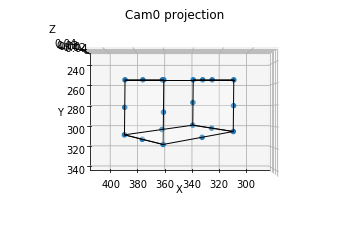

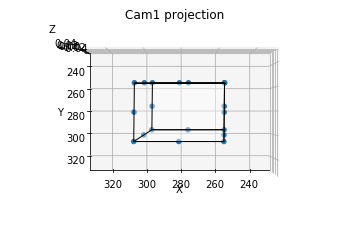

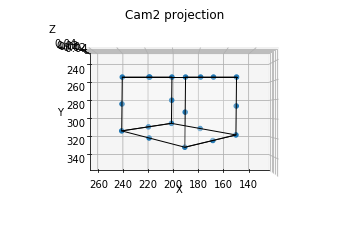

In [14]:
thetas = [np.radians(35), np.radians(0), np.radians(-35)]
D = [np.array([200, 0, 0]), np.array([0, 0, 0]), np.array([-200, 0, 0])]
Om = []
Xs = []
taus = []

i = 0
for theta, d in zip(thetas, D):
    Int, O, T = getPinHoleParams(d, theta)
    Xs.append(pinHole(W, Int, O, T))
    Om.append(O)
    taus.append(T)
    plotProj(Xs[-1][:, :2], title=f'Cam{i} projection')
    i+=1

IntOg = Int

# 3D Reconstruction

In [7]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})


def reconstruct3D(X_, Y_, O, T):
    A = np.zeros((X_.shape[0]*2, X_.shape[0]))
    b = np.zeros((X_.shape[0]*2,))
    W_rec = np.zeros((X_.shape[1], 3))
    
    for j in range(W_hat.shape[0]):
        i = 0
        for x, y, o, t in zip(X_, Y_, O, T):
            x_j = x[j]
            y_j = y[j]
            A[i] = np.array([(o[2][0]*x_j)-o[0][0], (o[2][1]*x_j) -
                             o[0][1], (o[2][2]*x_j)-o[0][2]])
            A[i+1] = np.array([(o[2][0]*y_j)-o[1][0],
                               (o[2][1]*y_j)-o[1][1], (o[2][2]*y_j)-o[1][2]])

            b[i] = t[0] - t[2]*x_j
            b[i+1] = t[1] - t[2]*y_j

            i += 2
        #Using eq from appendix C.47
        w_hat = np.linalg.inv(A.T @ A) @ (A.T @ b)
        W_rec[j] = w_hat
    return W_rec

def getReconstructParams(Xs, Om, taus, Int):

    O1 = Om[0]
    O2 = Om[1]
    O3 = Om[2]

    T1 = taus[0]
    T2 = taus[1]
    T3 = taus[2]

    X1 = Xs[0]
    X2 = Xs[1]
    X3 = Xs[2]

    X = np.array([[X1[:, 0]], [X2[:, 0]], [X3[:, 0]]]).reshape(3,20)
    Y = np.array([[X1[:, 1]], [X2[:, 1]], [X3[:, 1]]]).reshape(3,20)

    #Normalize projections
    X1_ = (np.linalg.inv(Int[:,:3]) @ X1.T).T
    X2_ = (np.linalg.inv(Int[:, :3]) @ X2.T).T
    X3_ = (np.linalg.inv(Int[:, :3]) @ X3.T).T

    X_ = np.array([[X1_[:, 0]], [X2_[:, 0]], [X3_[:, 0]]]).reshape(3, 20)
    Y_ = np.array([[X1_[:, 1]], [X2_[:, 1]], [X3_[:, 1]]]).reshape(3, 20)
    # X_.shape

    O = [O1[:-1],O2[:-1],O3[:-1]]
    T = np.array([T1, T2, T3]).reshape(3,4)[:, :-1] 
    return X_, Y_, O, T


X_, Y_, O, T = getReconstructParams(Xs, Om, taus, Int)
W_hat = np.zeros((X_.shape[1], 3))
W_hat = reconstruct3D(X_, Y_, O, T)

print(f'Estimated w = {W_hat.shape}')
print(f'True w = {W.shape}')

    
    


Estimated w = (20, 3)
True w = (20, 3)


# 2D Projections of Estimated 3D reconstruction

No handles with labels found to put in legend.


(20, 3)


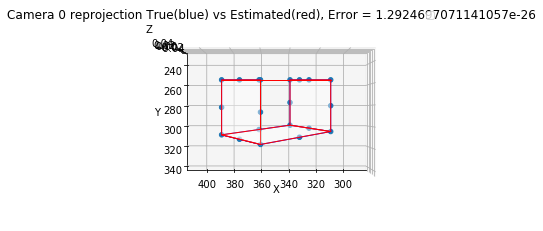

No handles with labels found to put in legend.


(20, 3)


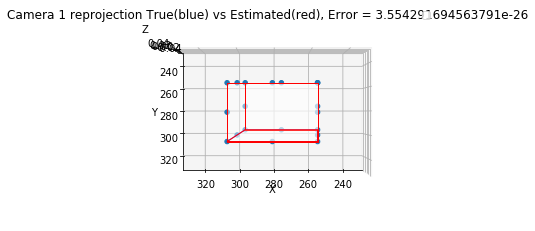

No handles with labels found to put in legend.


(20, 3)


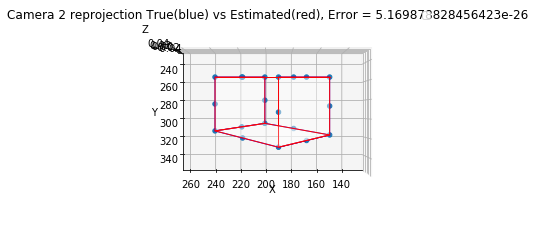

In [8]:
def flatten(a):
    return a.reshape((a.shape[0]*a.shape[1]))

Xs_hat = []
i = 0
for theta, d in zip(thetas, D):
    Int, O, T = getPinHoleParams(d, theta)
    x_hat = pinHole(W_hat, Int, O, T)
    Xs_hat.append(x_hat)
    x_true = Xs[i][:, :2]
    x_hat2D = x_hat[:,:2]
    E = np.sum((flatten(x_true)-flatten(x_hat2D))**2)
    plotReProj(x_true, x_hat2D,f'Camera {i} reprojection True(blue) vs Estimated(red), Error = {E}')
    plt.show()
    i += 1


# Noise sensitivity Analysis

No handles with labels found to put in legend.


(20, 3)


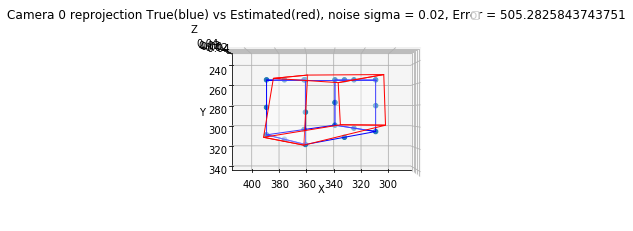

(20, 3)

No handles with labels found to put in legend.


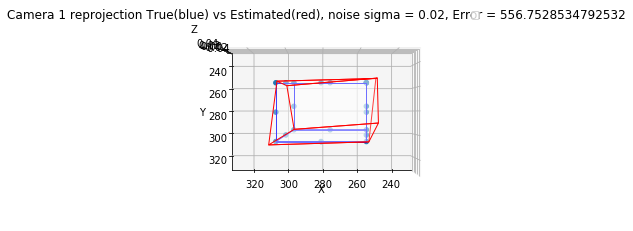

(20, 3)


No handles with labels found to put in legend.


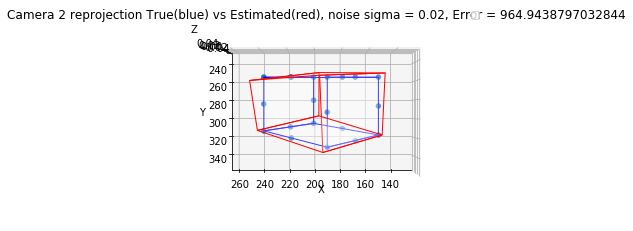

In [10]:
# Add noise
mu = 0
sigma = 0.02 #Play with noise sensitivity here
Xs_noisy = []

for x in Xs:
    noise = np.random.normal(mu, sigma, [x.shape[0], x.shape[1]])
    Xs_noisy.append(x + noise)

X_, Y_, O, T = getReconstructParams(Xs_noisy, Om, taus, Int)
W_hat = reconstruct3D(X_, Y_, O, T)

Xs_hat = []
i = 0
for theta, d in zip(thetas, D):
    Int, O, T = getPinHoleParams(d, theta)
    x_hat = pinHole(W_hat, Int, O, T)
    Xs_hat.append(x_hat)
    x_true = Xs[i][:, :2]
    x_hat2D = x_hat[:, :2]
    # print(f'x true shape: {x_true.shape}')
    # print(f'x hat2D shape: {x_hat2D.shape}')
    E = np.sum((flatten(x_true)-flatten(x_hat2D))**2)
    plotReProj(x_true, x_hat2D,
               f'Camera {i} reprojection True(blue) vs Estimated(red), noise sigma = {sigma}, Error = {E}')
    plt.show()
    i += 1

# print(f'Estimated w = {W_hat.shape}')
# print(f'True w = {W.shape}')


## Noise sensitivity plot

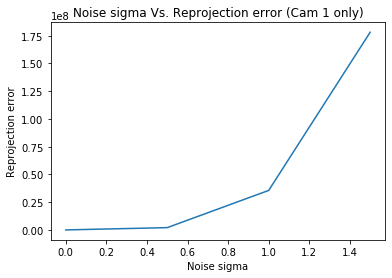

In [15]:
mu = 0
# sigma = 0.0  # Play with noise sensitivity here
E = []
S = []
for s in np.arange(0, 2, 0.5):
    Xs_noisy = []
    S.append(s)
    for x in Xs:
        noise = np.random.normal(mu, s, [x.shape[0], x.shape[1]])
        Xs_noisy.append(x + noise)

    X_, Y_, O, T = getReconstructParams(Xs_noisy, Om, taus, Int)
    W_hat = reconstruct3D(X_, Y_, O, T)

    Xs_hat = []
    i = 0

    Int, O, T = getPinHoleParams(D[0], thetas[0])
    x_hat = pinHole(W_hat, Int, O, T)
    Xs_hat.append(x_hat)
    x_true = Xs[i][:, :2]
    x_hat2D = x_hat[:, :2]
    E.append(np.sum((flatten(x_true)-flatten(x_hat2D))**2))

plt.plot(S, E)
plt.xlabel('Noise sigma')
plt.ylabel('Reprojection error')
plt.title("Noise sigma Vs. Reprojection error (Cam 1 only)")
plt.show()
